In [1]:
!git clone https://github.com/ml-ninja/Data_Driven_Science_Python_Demos.git


Cloning into 'Data_Driven_Science_Python_Demos'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 308 (delta 57), reused 14 (delta 8), pack-reused 180
Receiving objects: 100% (308/308), 220.07 MiB | 23.30 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Checking out files: 100% (121/121), done.


shape of obs (216, 4000)
Len of grp 216
['Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer']
shape of S  (216,)


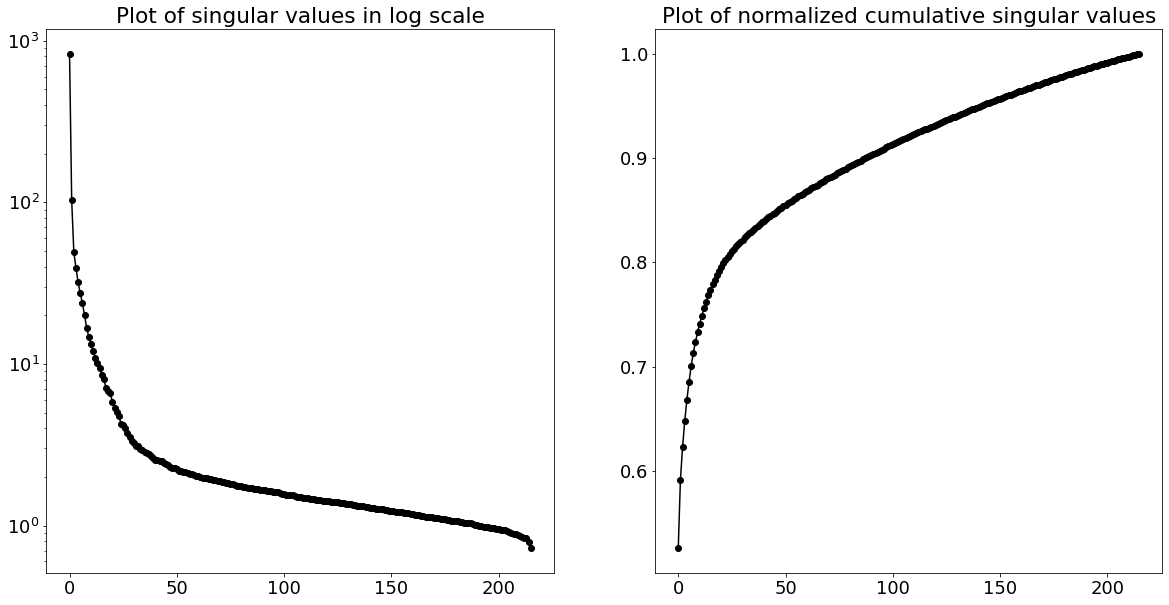

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})


obs = np.loadtxt(os.path.join('Data_Driven_Science_Python_Demos','DATA','ovariancancer_obs.csv'),delimiter=',')
print('shape of obs', obs.shape)

f = open(os.path.join('Data_Driven_Science_Python_Demos','DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")  # grp is a list
grp = grp[:obs.shape[0]]  # Trim off the last junk entry
print('Len of grp', len(grp))
print(grp[:20])

U, S, VT = np.linalg.svd(obs,full_matrices=0)
print('shape of S ', S.shape)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121, title='Plot of singular values in log scale')
ax1.semilogy(S,'-o',color='k')

ax2 = fig1.add_subplot(122, title='Plot of normalized cumulative singular values')
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

shape of VT (216, 4000)
shape of obs (216, 4000)
shape of VT[0,:] (4000,)
shape of obs[0,:] (4000,)
shape of U  (216, 216)
shape of S  (216,)


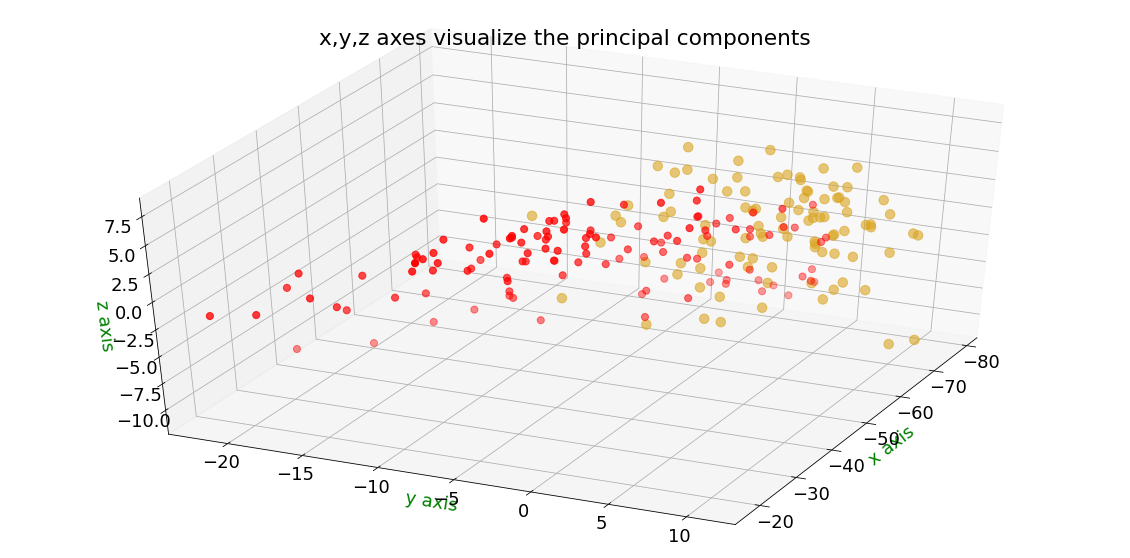

In [62]:

print('shape of VT', VT.shape)
print('shape of obs', obs.shape)
print('shape of VT[0,:]', VT[0,:].shape)
print('shape of obs[0,:]', obs[0,:].shape)
print('shape of U ', U.shape)
print('shape of S ', S.shape)

# obsMean = np.mean(obs, axis=0)
# print(obsMean.shape)
# print(obsMean)

# from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure()
# ax = Axes3D(fig2)
ax = fig2.add_subplot(111, projection='3d', title='x,y,z axes visualize the principal components')
ax.set_xlabel('x axis', color='g')
ax.set_ylabel('y axis', color='g')
ax.set_zlabel('z axis', color='g')

bx = []
by = []
bz = []
cx = []
cy = []
cz = []

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        cx.append(x)
        cy.append(y)
        cz.append(z)
    else:
        bx.append(x)
        by.append(y)
        bz.append(z)


# ax.plot3D(cx,cy,cz, 'gray')
ax.scatter3D(bx,by,bz, marker='o',c="goldenrod", alpha=0.6,s=90)  
ax.scatter3D(cx,cy,cz, marker='o',color='r',s=50)

ax.view_init(40,25)
# ax.view_init(elev=10., azim=ii)
plt.show()